In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [245]:
data = pd.read_csv("climate.csv")
data["date"] = data["date"].apply(pd.to_datetime)
data.drop_duplicates()
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [246]:
data["date"] = (data["date"]).astype(np.int64) / 1000000000
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,1.356998e+09,10.000000,84.500000,0.000000,1015.666667
1,1.357085e+09,7.400000,92.000000,2.980000,1017.800000
2,1.357171e+09,7.166667,87.000000,4.633333,1018.666667
3,1.357258e+09,8.666667,71.333333,1.233333,1017.166667
4,1.357344e+09,6.000000,86.833333,3.700000,1016.500000


Линейная интерполяция

In [247]:
x = data["date"][34:50].to_numpy()
y = data["meantemp"][34:50].to_numpy()

x1 = np.arange(x[0], x[15], 1)
y1 = np.interp(x1, x, y)

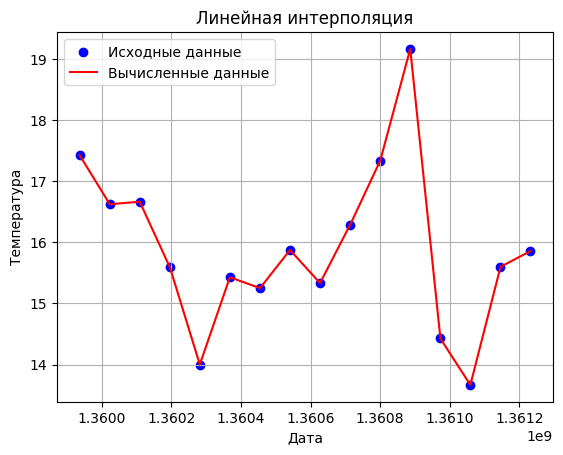

In [248]:
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x1, y1, color="red", label="Вычисленные данные")
plt.title("Линейная интерполяция")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.legend()
plt.grid(True)

Кубический сплайн

In [249]:
from scipy.interpolate import CubicSpline

In [250]:
cs = CubicSpline(x, y)
y1 = cs(x1)

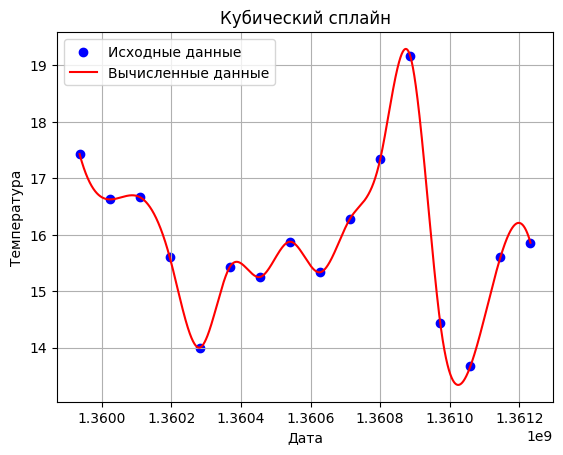

In [251]:
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x1, y1, color="red", label="Вычисленные данные")
plt.title("Кубический сплайн")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.legend()
plt.grid(True)

Интерполяция Лагранжа

In [252]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

Без нормализации

In [253]:
poly = lagrange(x, y)

y1 = Polynomial(poly.coef[::-1])(x1)

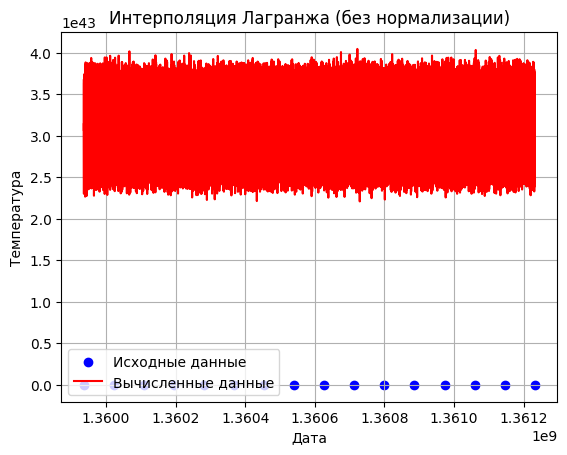

In [254]:
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x1, y1, color="red", label="Вычисленные данные")
plt.title("Интерполяция Лагранжа (без нормализации)")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.legend()
plt.grid(True)

С нормализацией

In [255]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [256]:
x1 = np.arange(x[0], x[15] + 0.005, 0.005)
poly = lagrange(x, y)
y1 = Polynomial(poly.coef[::-1])(x1)

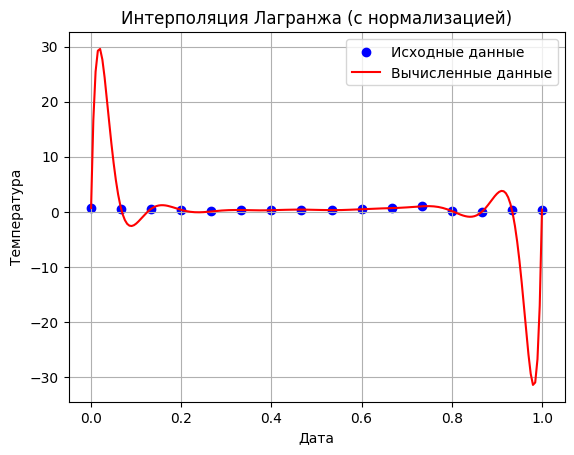

In [257]:
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x1, y1, color="red", label="Вычисленные данные")
plt.title("Интерполяция Лагранжа (c нормализацией)")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.legend()
plt.grid(True)

Интерполяция Ньютона (Berkeley Python Numerical Methods)

In [258]:
x = data["date"][34:50].to_numpy()
y = data["meantemp"][34:50].to_numpy()

x1 = np.arange(x[0], x[15], 1)

In [259]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [260]:
a_s = divided_diff(x, y)[0, :]
y1 = newton_poly(a_s, x, x1)

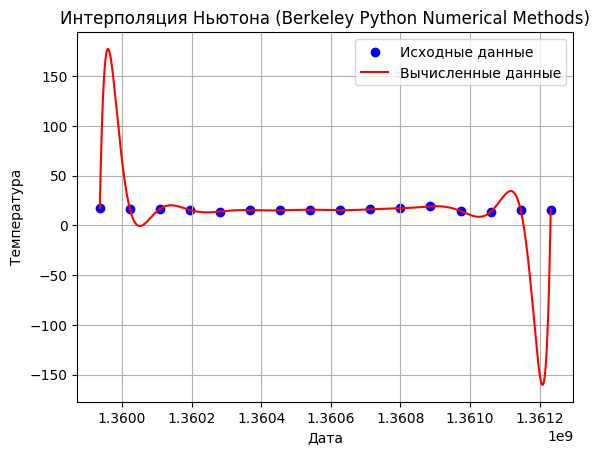

In [261]:
plt.scatter(x, y, color="blue", label="Исходные данные")
plt.plot(x1, y1, color="red", label="Вычисленные данные")
plt.title("Интерполяция Ньютона (Berkeley Python Numerical Methods)")
plt.xlabel("Дата")
plt.ylabel("Температура")
plt.legend()
plt.grid(True)